# Decision Tree Classification

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import dataset
ds=pd.read_csv('buy_car.csv')
ds.head()

,Montly Salary,age,Y/N
0,2386,18,0
1,2486,19,0
2,2586,20,0
3,2686,20,0
4,2756,20,0


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Montly Salary  400 non-null    int64
 1   age            400 non-null    int64
 2   Y/N            400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,2].values

In [5]:
#splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
# #Feature Scaling (not required for tree based algorithm)
# from sklearn.preprocessing import StandardScaler
# sc_x=StandardScaler()
# x_train=sc_x.fit_transform(x_train)
# x_test=sc_x.transform(x_test)

In [7]:
#fitting Decision Tree Classifier to the training set 
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier.fit(x_train,y_train)
#Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations.
#The Gini Index or Gini Impurity is calculated by subtracting the sum of the squared probabilities of each class from one

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
# #fitting SVM classifier to the training set 
# from sklearn.svm import SVC
# classifier= SVC(kernel='rbf',random_state=0)
# classifier.fit(x_train,y_train)

In [9]:
#Predict the test set results
y_pred=classifier.predict(x_test)

In [10]:
y_test,y_pred

(array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64),
 array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64))

In [11]:
#Making Confusion Matrix – to check whether the test set gives the correct result
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [12]:
cm

array([[40,  2],
       [ 4, 34]], dtype=int64)

In [19]:
# Finding accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.925


In [14]:
# xP=sc_x.transform([[6000,35]])
# print(xP)

In [15]:
# y_pred_new=classifier.predict(xP)
# print(y_pred_new)

## Predicting salary value = RM15000 and age=21

In [16]:
# # Predicting a value salary=15000 and age=21
# y_pred_new=classifier.predict(sc_x.transform([[15000,21]]))
# print(y_pred_new)

In [17]:
# Predicting a value salary=15000 and age=21
y_pred_new=classifier.predict([[15000,21]])
print(y_pred_new)

[0]


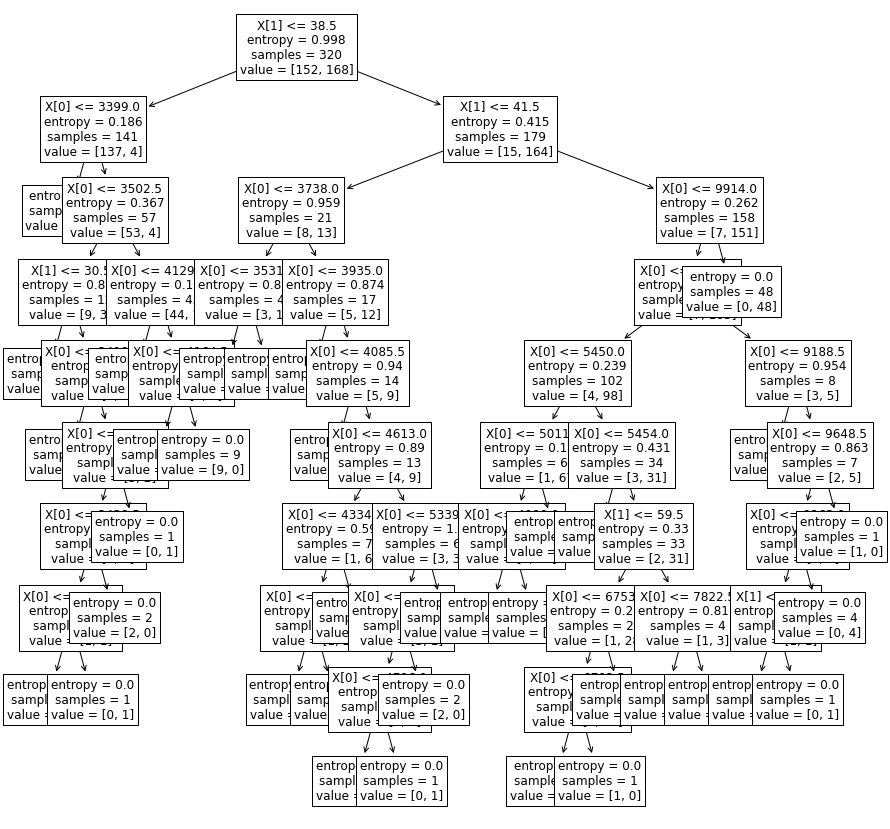

In [18]:
#plot tree
from sklearn import tree
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))  # set plot size (denoted in inches)
tree.plot_tree(classifier.fit(x_train,y_train),fontsize=12)
plt.show()